# Libraries

In [1]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score
from dython.nominal import identify_numeric_columns,identify_nominal_columns,associations
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from joblib import dump
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

# Data

In [2]:
data = pd.read_csv("bank-additional-full.csv",sep=";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
data.replace("unknown",np.nan,inplace=True)
data.dropna(inplace=True)

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30488 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  object 
 5   housing         30488 non-null  object 
 6   loan            30488 non-null  object 
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  duration        30488 non-null  int64  
 11  campaign        30488 non-null  int64  
 12  pdays           30488 non-null  int64  
 13  previous        30488 non-null  int64  
 14  poutcome        30488 non-null  object 
 15  emp.var.rate    30488 non-null  float64
 16  cons.price.idx  30488 non-null  float64
 17  cons.conf.idx   30488 non-null  floa

Menghitung korelasi dan mengambil korelasi variabel independen terhadap variabel dependen.

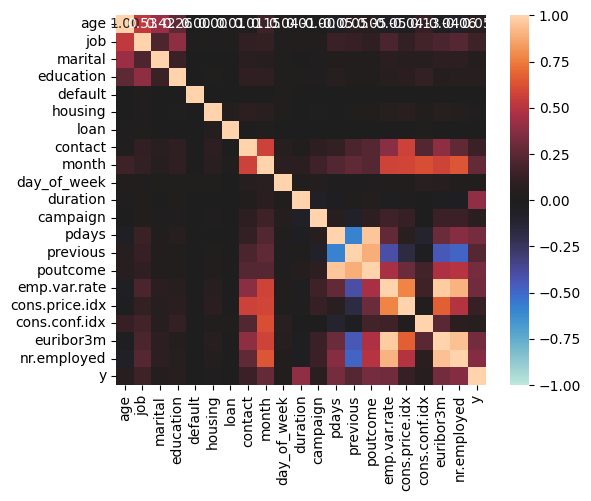

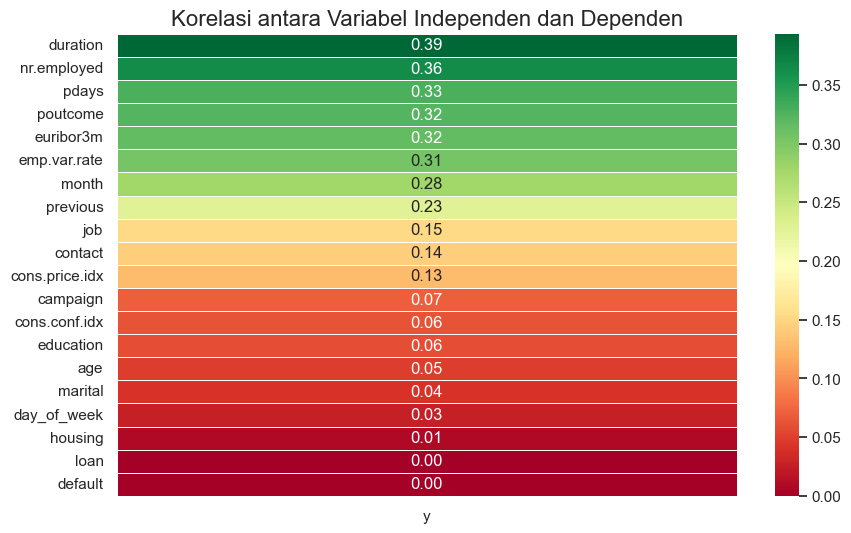

In [6]:
correlation = associations(data)
data_correlation = correlation["corr"].iloc[:-1][["y"]].sort_values(by="y", ascending=False)

# Tata letak dan visualisasi menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.set(font_scale=1)
sns.heatmap(data_correlation, annot=True, cmap="RdYlGn", fmt=".2f", linewidths=.5, annot_kws={"size": 12})
plt.title('Korelasi antara Variabel Independen dan Dependen', fontsize=16)
plt.show()

Koefisien korelasi yang < atau = 2 dianggap sangat lemah, sehingga sebaiknya variabel yang memiliki korelasi sangat lemah dihilangkan.

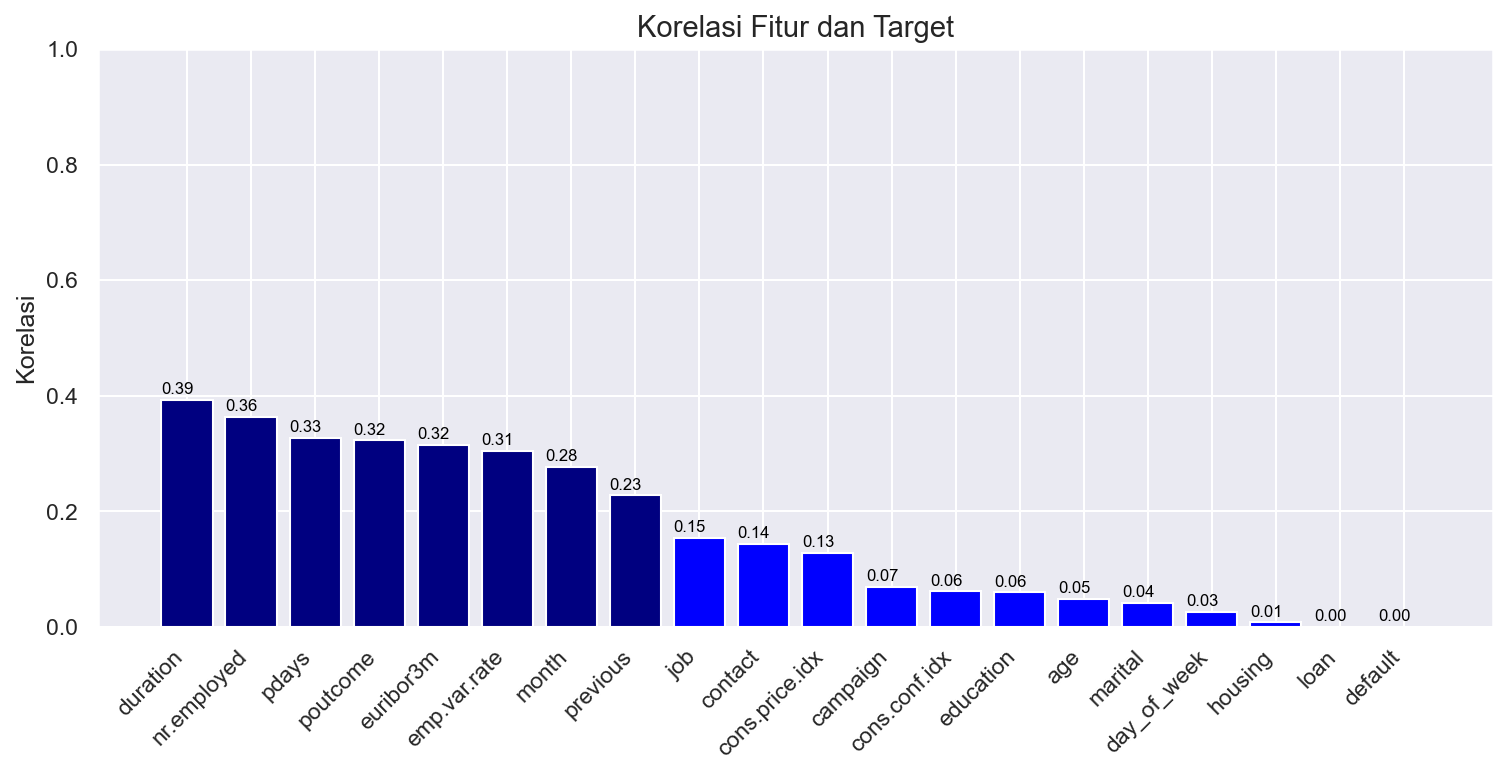

In [7]:
# Warna untuk bar
colors = np.where(data_correlation['y'] >= 0.2, 'navy', 'blue')

# Plot batang
plt.figure(figsize=(12, 5), dpi=150)
bars = plt.bar(data_correlation.index, data_correlation['y'], color=colors)

# Menambahkan label dan anotasi
for bar, value in zip(bars, data_correlation['y']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.01, f'{value:.2f}', ha='center', color='black', fontsize=8)

# Menambahkan warna batang
plt.title("Korelasi Fitur dan Target", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Korelasi")
plt.ylim(0, 1)  # Batasi sumbu y antara 0 dan 1
plt.show()

In [8]:
# Ambil nama kolom yang memiliki korelasi dengan target kurang dari 0.2
columns_to_drop = data_correlation[data_correlation["y"] < 0.2].index.tolist()

# Hapus kolom-kolom tersebut dari dataset
data = data.drop(columns=columns_to_drop)
data.head()

,month,duration,pdays,previous,poutcome,emp.var.rate,euribor3m,nr.employed,y
0,may,261,999,0,nonexistent,1.1,4.857,5191.0,no
2,may,226,999,0,nonexistent,1.1,4.857,5191.0,no
3,may,151,999,0,nonexistent,1.1,4.857,5191.0,no
4,may,307,999,0,nonexistent,1.1,4.857,5191.0,no
6,may,139,999,0,nonexistent,1.1,4.857,5191.0,no


In [9]:
# Inisialisasi LabelEncoder
LE = LabelEncoder()

# Salin dataset dan terapkan LabelEncoder
X_encoded = data.drop("y", axis=1).copy()
for column in X_encoded.columns:
    if X_encoded[column].dtype == 'object':  # Jika variabel kategorikal
        X_encoded[column] = LE.fit_transform(X_encoded[column])

# Encoding variabel target
y_encoded = LE.fit_transform(data["y"])

# Tampilkan beberapa baris pertama dari dataset yang sudah diubah
X_encoded.head()

,month,duration,pdays,previous,poutcome,emp.var.rate,euribor3m,nr.employed
0,6,261,999,0,1,1.1,4.857,5191.0
2,6,226,999,0,1,1.1,4.857,5191.0
3,6,151,999,0,1,1.1,4.857,5191.0
4,6,307,999,0,1,1.1,4.857,5191.0
6,6,139,999,0,1,1.1,4.857,5191.0


In [10]:
# Memisahkan dataset menjadi subset pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=8)

In [11]:
scaler = StandardScaler()

# Normalisasi fitur pada dataset pelatihan dan terapkan normalisasi pada dataset pengujian
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Logistic Regression
---
Membuat dan melatih model Logistic Regression

In [12]:
logistic_model = LogisticRegression(class_weight= 'balanced', random_state = 8)
logistic_model.fit(scaled_X_train,y_train)

LogisticRegression(class_weight='balanced', random_state=8)

Gunakan Logistic Regression untuk memprediksi set pengujian

In [14]:
logistic_prediction = logistic_model.predict(scaled_X_test)

Hasil prediksi model Logistic Regression

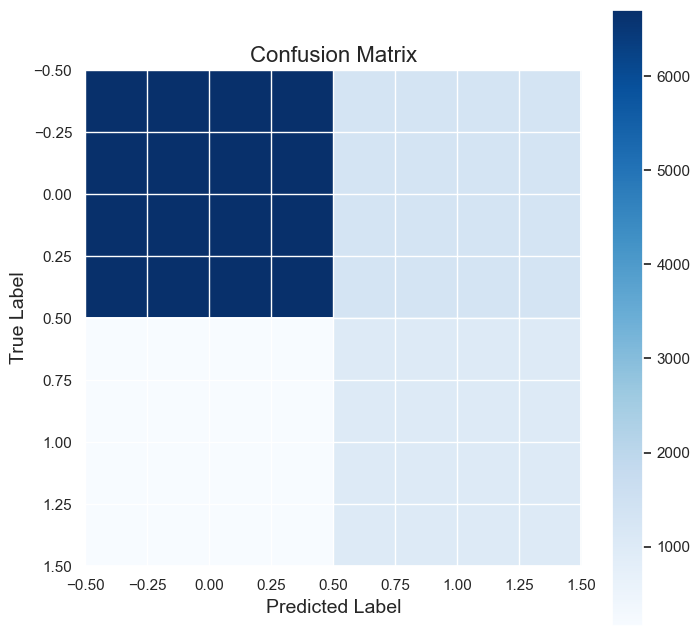

In [15]:
# Make predictions using the logistic model
logistic_prediction = logistic_model.predict(scaled_X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, logistic_prediction)

# Plot confusion matrix
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix", fontsize=16)
plt.colorbar()

# Adding axis labels
classes = logistic_model.classes_tick_marks = classes = range
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

Skor akurasi model regresi logistik 

In [17]:
print("Accuracy = " + str(np.round(accuracy_score(y_test, logistic_prediction) * 100, 3)) + "%")

Accuracy = 84.148%


Latih kembali seluruh kumpulan data untuk membuat model regresi logistik akhir

In [18]:
final_logistic_model = LogisticRegression(class_weight="balanced", random_state=8, max_iter=10_000).fit(scaled_X_train,y_train)
final_logistic_model

LogisticRegression(class_weight='balanced', max_iter=10000, random_state=8)

Koefisien beta regresi logistik

In [19]:
pd.DataFrame({
    "Variables":["Constant"] + X_encoded.columns.tolist(),
    "Beta Coefficients":[final_logistic_model.intercept_[0]] + final_logistic_model.coef_[0].tolist()
}).set_index("Variables")

,Beta Coefficients
Variables,
Constant,-1.235631
month,-0.416027
duration,1.686681
pdays,-0.187514
previous,-0.004760
poutcome,0.214408
emp.var.rate,-1.662959
euribor3m,1.965908
nr.employed,-1.759851


Persamaan logistic regression di mana $ \log(\frac{\pi(x)}{1 - \pi(x}) = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n$

In [20]:
x = sp.Symbol("(x)")
beta = []
for _ in X_encoded.columns:
    beta.append(sp.Symbol(f"({_})"))
    
total = np.round(final_logistic_model.intercept_[0],3)
for _ in range(len(X_encoded.columns)):
    total = total + (beta[_] * np.round(final_logistic_model.coef_[0,_],3))
    
sp.Eq(sp.log((sp.pi*x) / (1 - (sp.pi*x))),total)

Eq(log(pi*(x)/(-pi*(x) + 1)), 1.687*(duration) - 1.663*(emp.var.rate) + 1.966*(euribor3m) - 0.416*(month) - 1.76*(nr.employed) - 0.188*(pdays) + 0.214*(poutcome) - 0.005*(previous) - 1.236)

# K-Nearest Neighbors
---
Hitung dan visualisasikan tingkat kesalahan untuk nilai 25 K

In [23]:
# Initialize a list to store errors
errors = []
# Try different values of n_neighbors
for n_neighbors in range(1, 26):
# Initialize KNeighborsClassifier with current n_neighbors
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors) 
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
# Fit the model on the scaled training data
    knn_model.fit(scaled_X_train, y_train)
    knn_model.fit(scaled_X_train, y_train)
# Make predictions on the scaled test data
    knn_pred = knn_model.predict(scaled_X_test)
    knn_pred = knn_model.predict(scaled_X_test)
# Calculate the classification error and append to the list
    error = 100 - (accuracy_score(y_test, knn_pred) * 100)
    errors.append(error) 

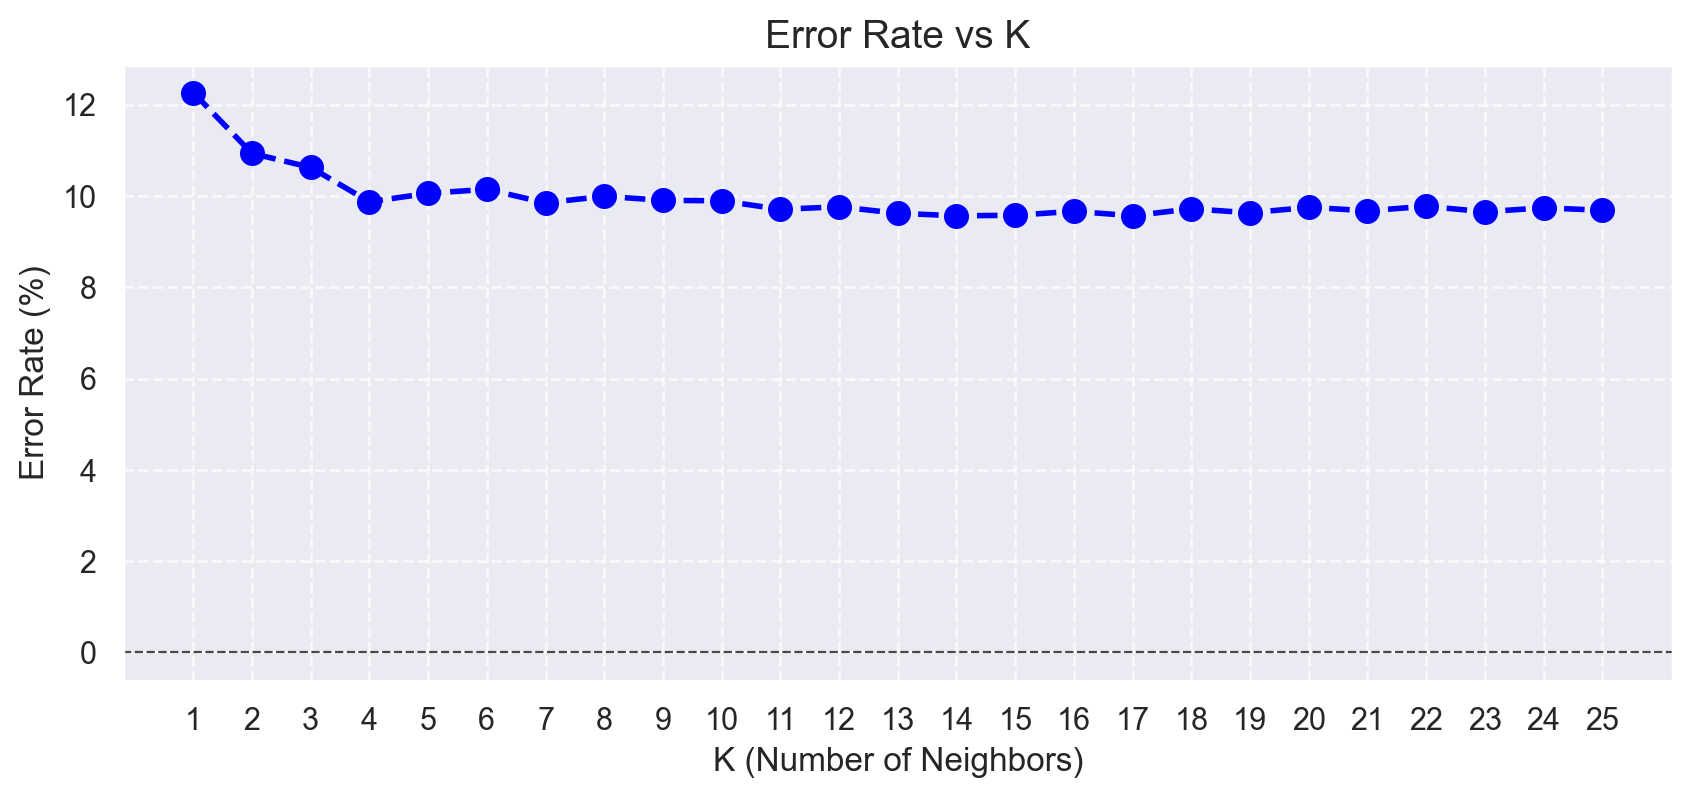

In [24]:
# Merencanakan tingkat kesalahan vs K
plt.figure(figsize=(10, 4), dpi=200)
plt.plot(range(1, 26), errors, color="blue", marker="o", linestyle='dashed', linewidth=2, markersize=8)

# Menambahkan judul dan label
plt.title("Error Rate vs K", fontsize=14)
plt.xlabel("K (Number of Neighbors)", fontsize=12)
plt.ylabel("Error Rate (%)", fontsize=12)

# Menambahkan grid untuk keterbacaan yang lebih baik
plt.grid(True, linestyle='--', alpha=0.7)

# Menyesuaikan kutu sumbu x
plt.xticks(range(1, 26))

# Menambahkan garis horizontal pada y=0 untuk referensi yang lebih baik
plt.axhline(0, color='black', linewidth=0.8, linestyle='--', alpha=0.7)

plt.show()

Buat dan latih model k-nearest neighbors dengan k = 5

In [25]:
knearest_model = KNeighborsClassifier(n_neighbors=5,weights="distance").fit(scaled_X_train,y_train)
knearest_model

KNeighborsClassifier(weights='distance')

Gunakan k-nearest neighbors untuk memprediksi set pengujian

In [26]:
knearest_prediction = knearest_model.predict(scaled_X_test)

Hasil prediksi model k-nearest neighbors

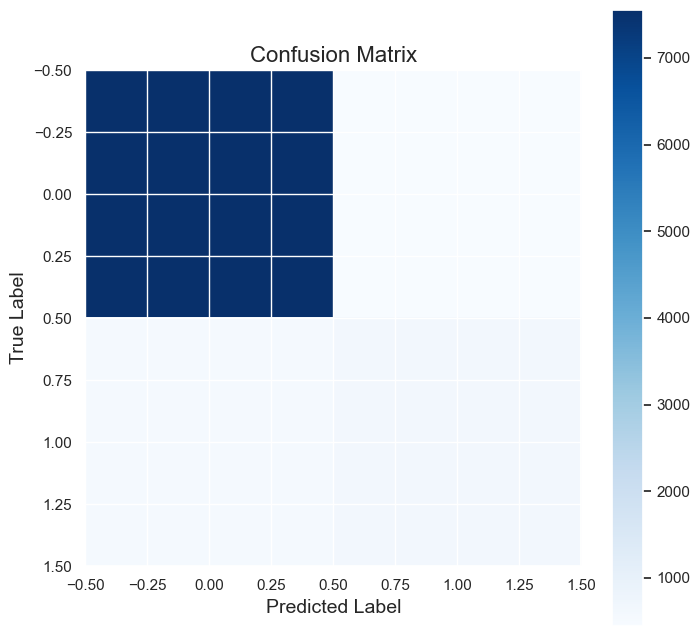

In [27]:
# Make predictions using the KNN model
knearest_pred = knearest_model.predict(scaled_X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, knearest_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix", fontsize=16)
plt.colorbar()

# Adding axis labels
classes = knearest_model.classes_tick_marks = classes = range
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

Skor akurasi model k-nearest neighbors dan melatih ulang seluruh kumpulan data untuk membuat model k-nearest neighbors terakhir

In [28]:
print("Accuracy = " + str(np.round(accuracy_score(y_test, knearest_prediction)*100,3)) + "%")

Accuracy = 89.275%


In [29]:
final_knn_model = KNeighborsClassifier(n_neighbors=5,weights="distance").fit(scaled_X_train,y_train)
final_knn_model

KNeighborsClassifier(weights='distance')

# Support Vector Machine
---
Membuat dan melatih model support vector Machine

In [30]:
support_model = SVC(class_weight="balanced",random_state=8).fit(scaled_X_train,y_train)
support_model

SVC(class_weight='balanced', random_state=8)

Gunakan Support Vector Machine untuk memprediksi set pengujian dan Hasil prediksi model Support Vector Machine

In [31]:
support_prediction = support_model.predict(scaled_X_test)

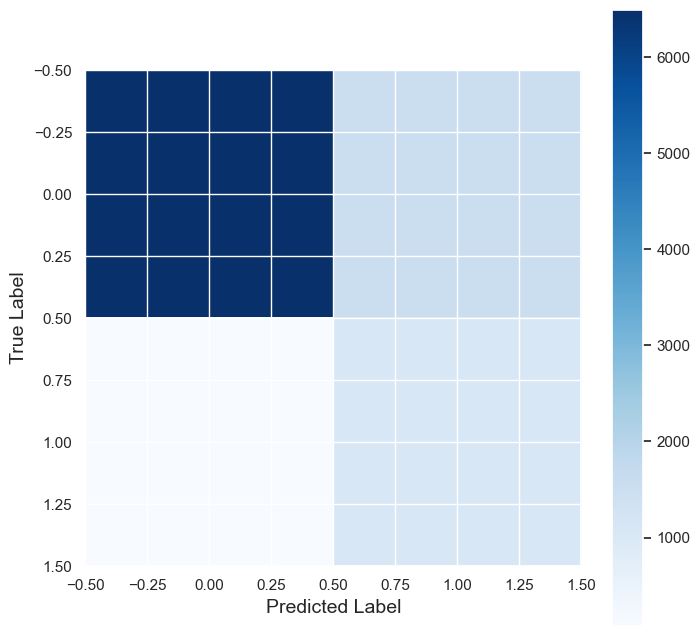

In [32]:
support_prediction = support_model.predict(scaled_X_test)
cm = confusion_matrix(y_test, support_prediction)

plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title
plt.colorbar()

classes = support_model.classes_tick_marks = classes = range
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

Skor akurasi model Support Vector Machine dan melatih ulang seluruh kumpulan data untuk membuat model Support Vector Machine akhir

In [33]:
print("Accuracy = " + str(np.round(accuracy_score(y_test, support_prediction)*100,3)) + "%")

Accuracy = 82.65%


In [34]:
final_support_model = SVC(class_weight="balanced",random_state=42).fit(scaled_X_train,y_train)
final_support_model

SVC(class_weight='balanced', random_state=42)

# Decision Tree
---
Membuat dan melatih model Decision Tree, menggunakan Decision Tree untuk memprediksi set pengujian dan hasil prediksi model Decision Tree

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30488 entries, 0 to 41187
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         30488 non-null  object 
 1   duration      30488 non-null  int64  
 2   pdays         30488 non-null  int64  
 3   previous      30488 non-null  int64  
 4   poutcome      30488 non-null  object 
 5   emp.var.rate  30488 non-null  float64
 6   euribor3m     30488 non-null  float64
 7   nr.employed   30488 non-null  float64
 8   y             30488 non-null  object 
dtypes: float64(3), int64(3), object(3)
memory usage: 2.3+ MB


In [36]:
decision_model = DecisionTreeClassifier(max_depth=6,class_weight="balanced",random_state=8).fit(scaled_X_train,y_train)
decision_model

DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=8)

In [37]:
decision_prediction = decision_model.predict(scaled_X_test)

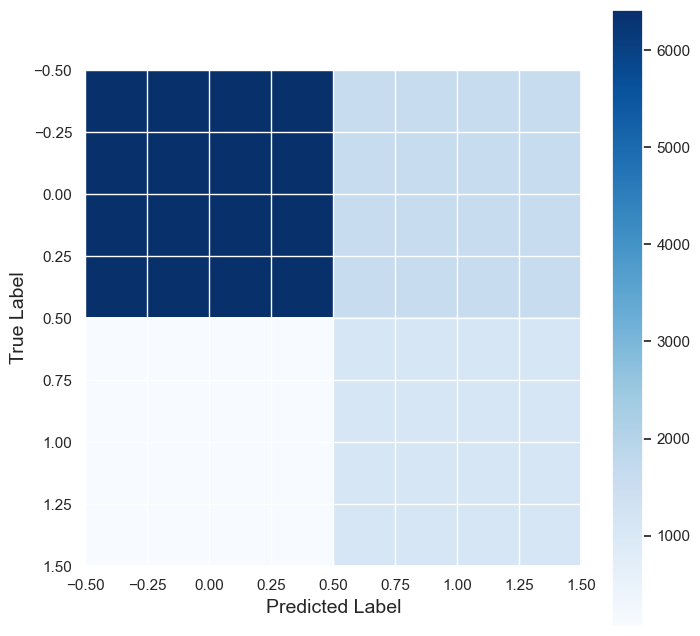

In [38]:
decision_prediction = decision_model.predict(scaled_X_test)
cm = confusion_matrix(y_test, decision_prediction)

plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title
plt.colorbar()

classes = decision_model.classes_tick_marks = classes = range
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

Skor akurasi model decision tree dan fitur model decision tree 

In [42]:
print("Accuracy = " + str(np.round(accuracy_score(y_test, decision_prediction)*100,3)) + "%")

Accuracy = 81.885%


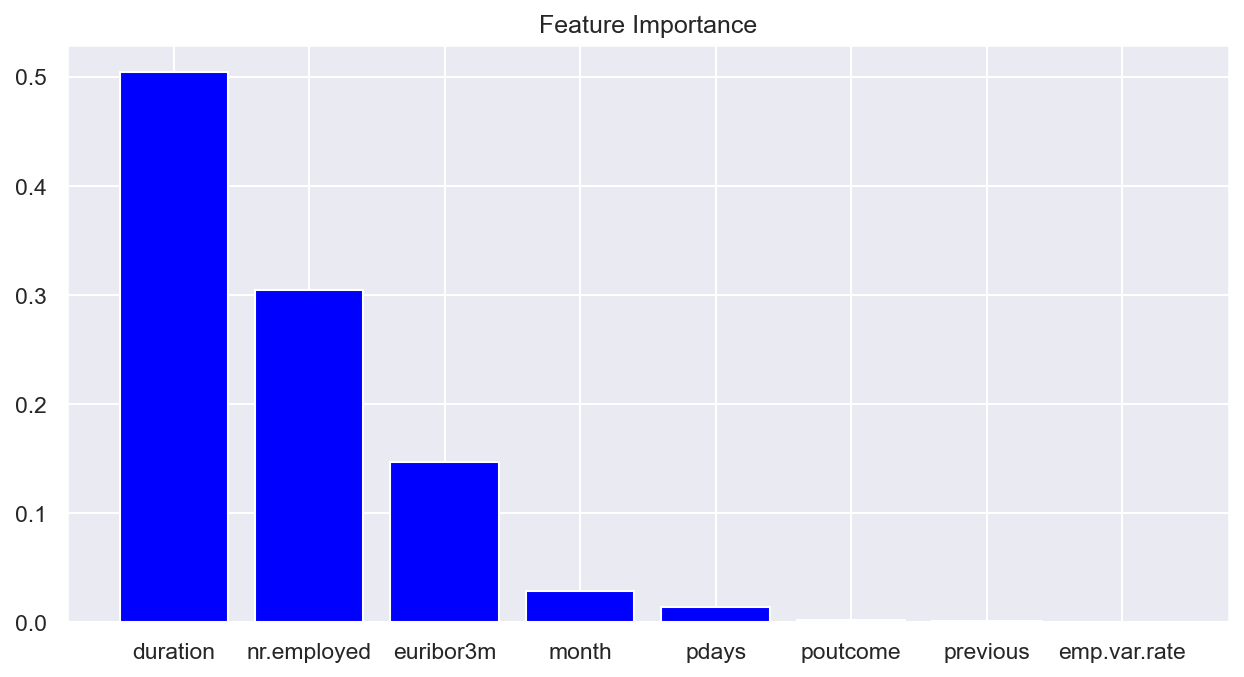

In [48]:
decision_feature = pd.DataFrame(
    data=decision_model.feature_importances_, index=X_encoded.columns, columns=["Feature Importance"]
).sort_values("Feature Importance", ascending=False)

fig = plt.figure(figsize=(10,5),dpi=150)
plt.bar(decision_feature.index,decision_feature["Feature Importance"],color="blue")
plt.title("Feature Importance")
plt.show()

Melatih kembali seluruh kumpulan data untuk membuat model decision tree akhir dan Visualisasikan model decision tree

In [45]:
final_decision_model = DecisionTreeClassifier(max_depth=5, class_weight="balanced", random_state=8).fit(scaled_X_train,y_train)
final_decision_model

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=8)

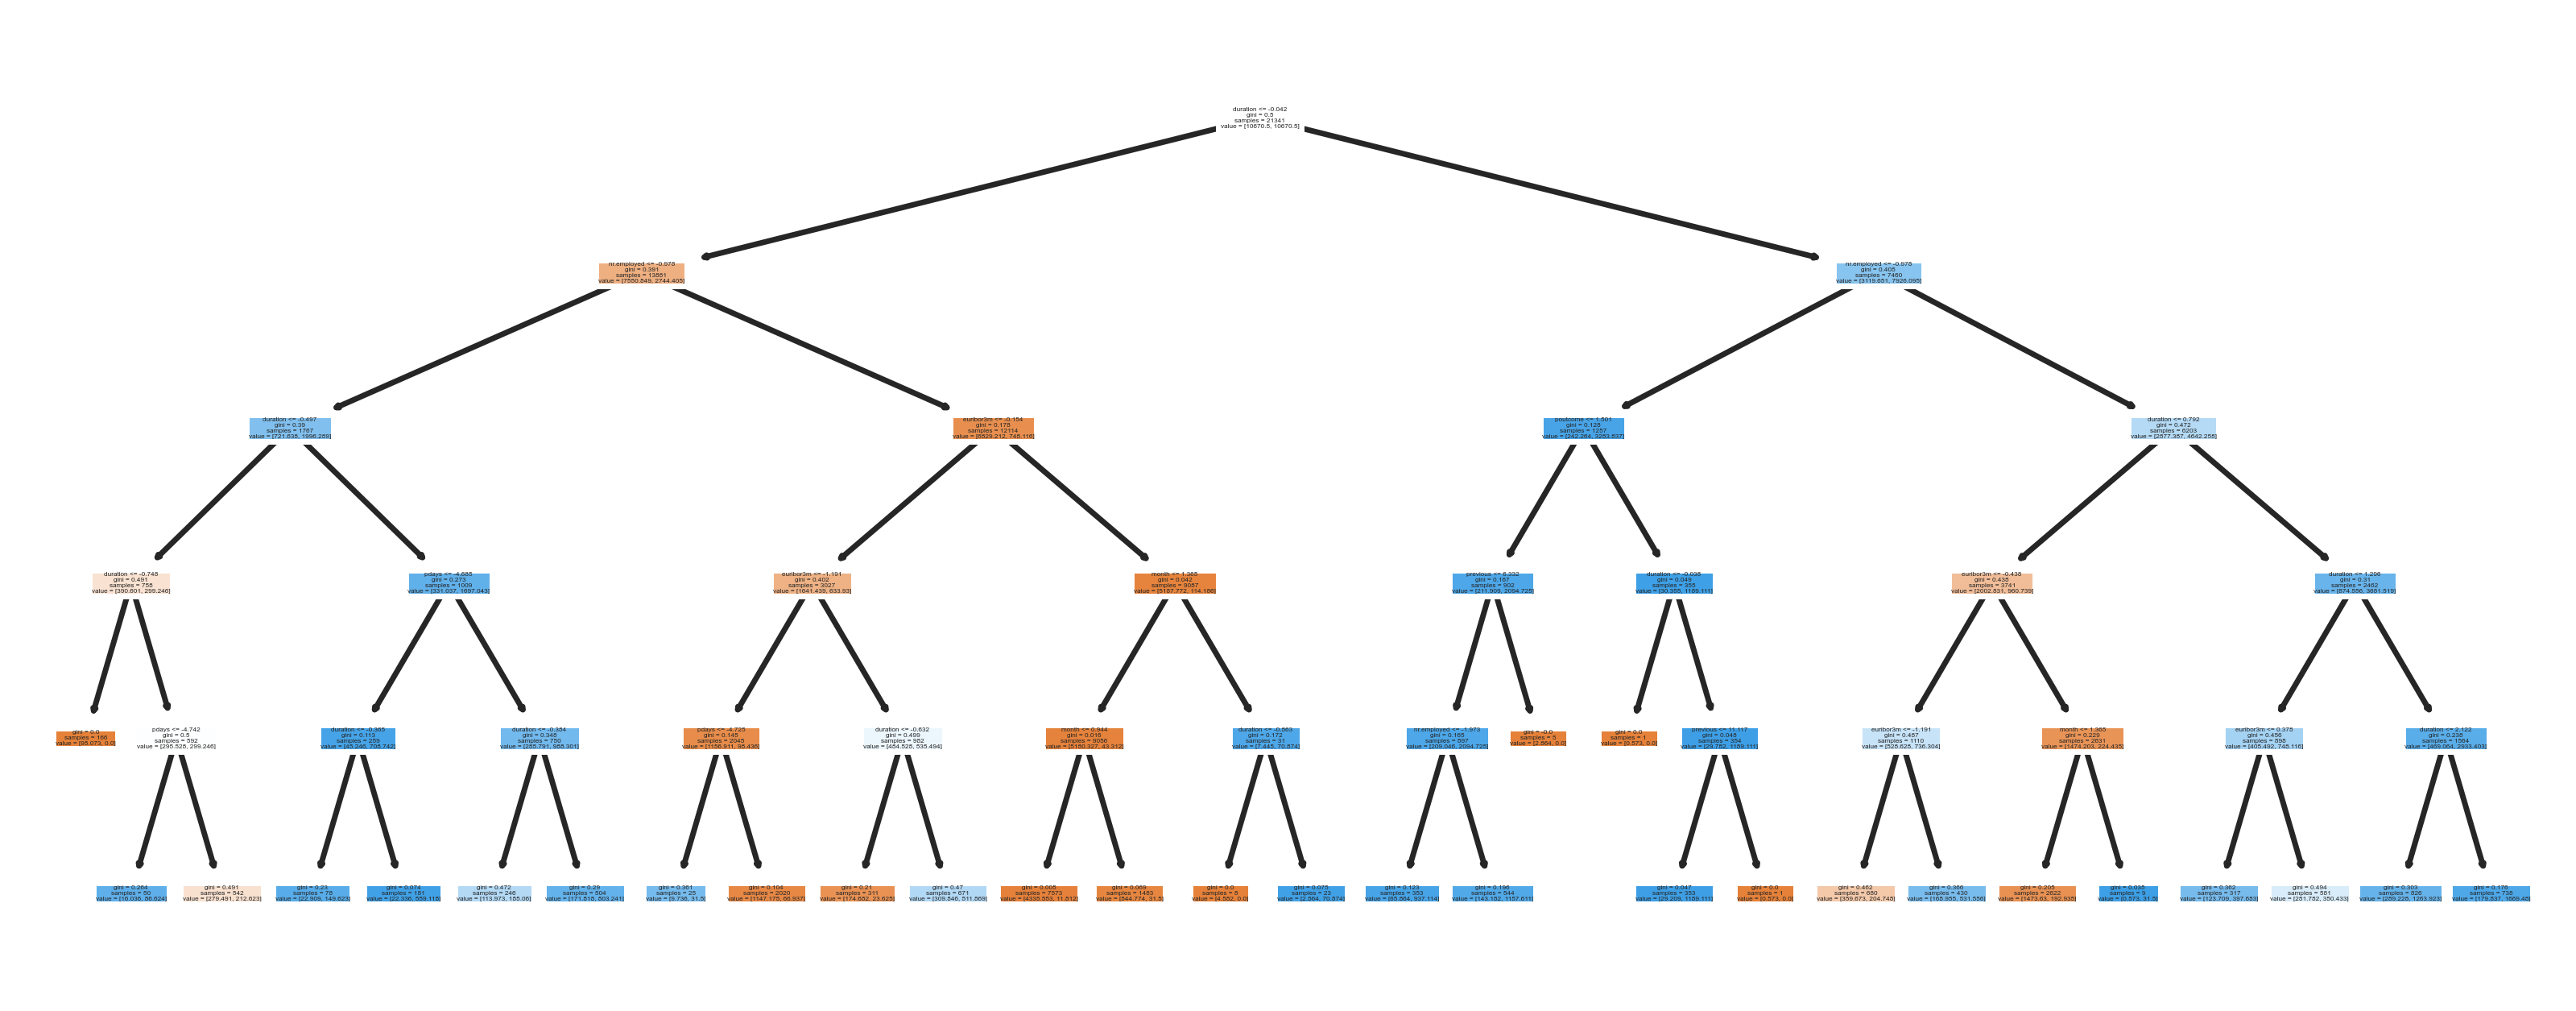

In [50]:
plt.figure(figsize=(8,3),dpi=500)
plot_tree(final_decision_model, filled=True, feature_names=X_encoded.columns)
plt.show()

# Random Forest
---
Hitung dan visualisasikan tingkat kesalahan untuk 25 jumlah pohon

In [53]:
errors = []
for _ in range(1,26):
    temp_model = RandomForestClassifier(n_estimators=_, class_weight="balanced", random_state=8)
    temp_model.fit(scaled_X_train,y_train)
    temp_pred = temp_model.predict(scaled_X_test)
    error = 100 - (accuracy_score(y_test,temp_pred)*100)
    errors.append(error)

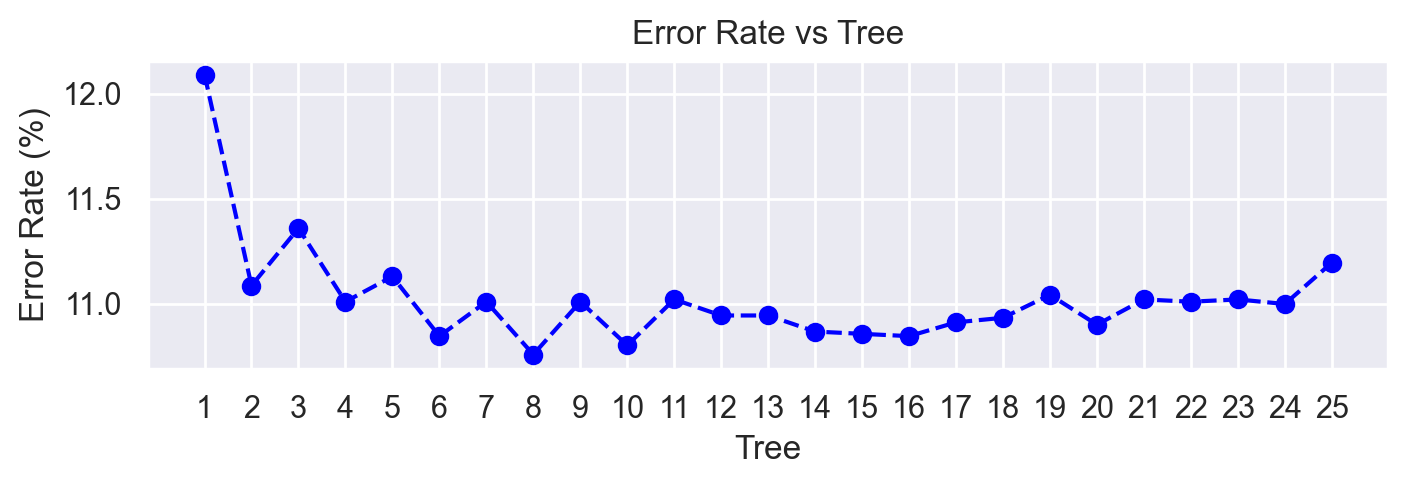

In [54]:
plt.figure(figsize=(8,2),dpi=200)
plt.plot(range(1,26),errors,color="blue",marker="o",ls="--")
plt.title("Error Rate vs Tree")
plt.xlabel("Tree")
plt.xticks(range(1,26))
plt.ylabel("Error Rate (%)")
plt.show()

Buat dan latih model random forest dengan 6 trees, mengunakan random forest untuk memprediksi set pengujian dan hasil prediksi model random forest

In [55]:
random_model = RandomForestClassifier(n_estimators=6, class_weight="balanced", random_state=8).fit(scaled_X_train,y_train)
random_model

RandomForestClassifier(class_weight='balanced', n_estimators=6, random_state=8)

In [56]:
random_prediction = random_model.predict(scaled_X_test)

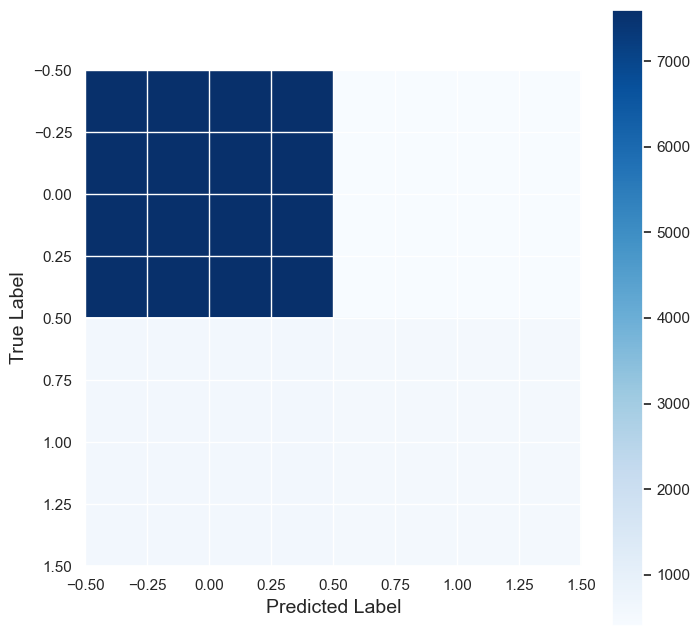

In [57]:
random_prediction = random_model.predict(scaled_X_test)
cm = confusion_matrix(y_test, random_prediction)

plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title
plt.colorbar()

classes = random_model.classes_tick_marks = classes = range
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

Skor akurasi model random forest, fitur model random forest dan melatih ulang seluruh kumpulan data untuk membuat model random forest akhir

In [59]:
print("Accuracy = " + str(np.round(accuracy_score(y_test, random_prediction)*100,3)) + "%")

Accuracy = 89.155%


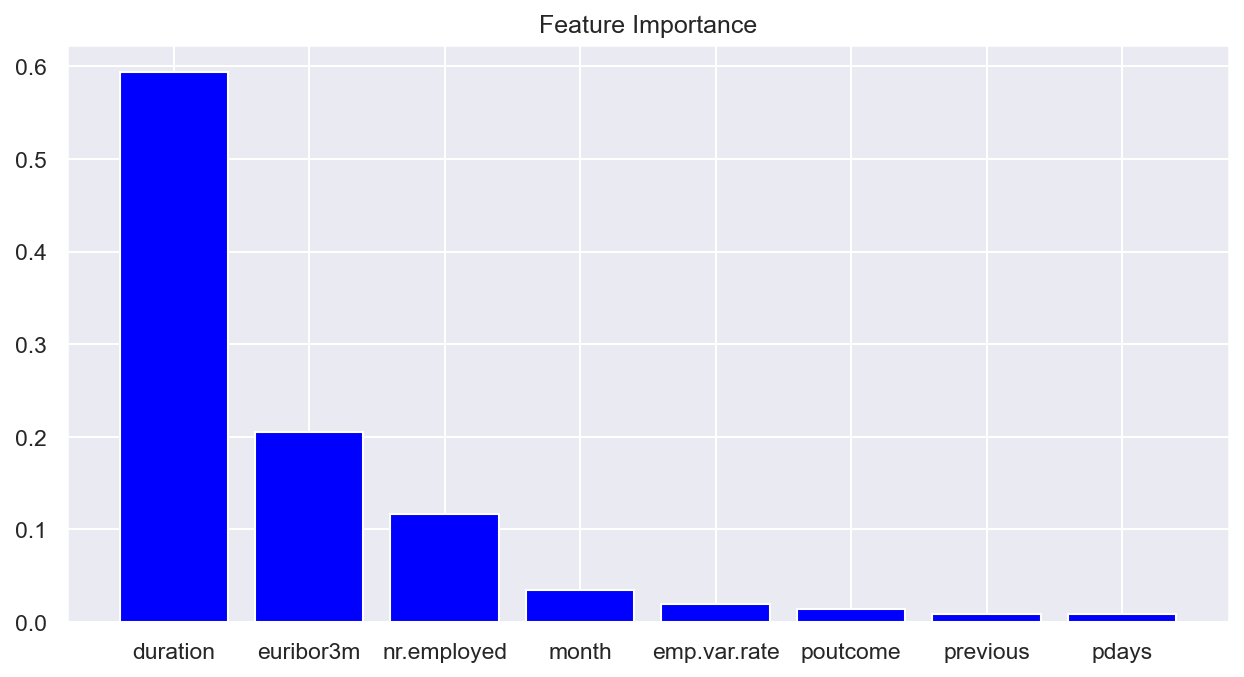

In [63]:
random_feature = pd.DataFrame(
    data=random_model.feature_importances_, index=X_encoded.columns, columns=["Feature Importance"]
).sort_values("Feature Importance", ascending=False)

fig = plt.figure(figsize=(10,5),dpi=150)
plt.bar(random_feature.index,random_feature["Feature Importance"],color="blue")
plt.title("Feature Importance")
plt.show()


In [65]:
final_random_model = RandomForestClassifier(n_estimators=6, class_weight="balanced", random_state=8).fit(scaled_X_train,y_train)
final_random_model

RandomForestClassifier(class_weight='balanced', n_estimators=6, random_state=8)

# Naive Bayes
---
Buat dan latih model naive Bayes, mengunakan metode naive Bayes untuk memprediksi set pengujian dan hasil prediksi model naive Bayes

In [66]:
naive_model = BernoulliNB().fit(scaled_X_train,y_train)
naive_model

BernoulliNB()

In [67]:
naive_prediction = naive_model.predict(scaled_X_test)

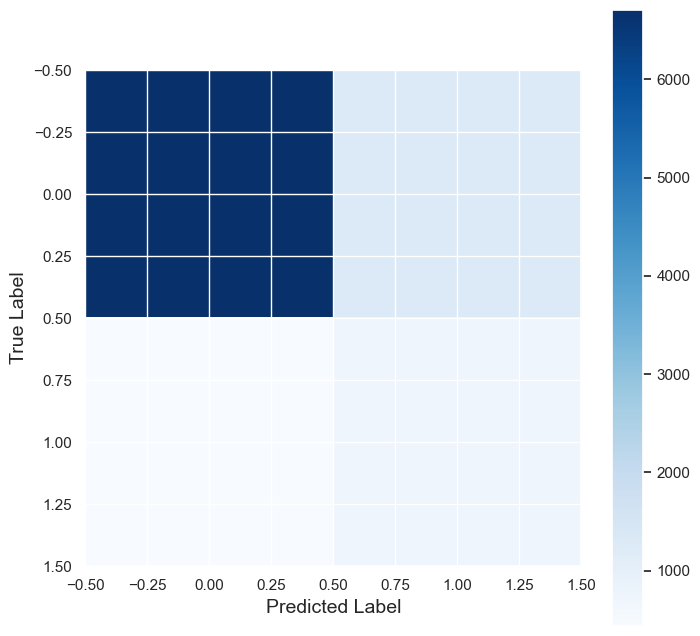

In [68]:
naive_prediction = naive_model.predict(scaled_X_test)
cm = confusion_matrix(y_test, naive_prediction)

plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title
plt.colorbar()

classes = naive_model.classes_tick_marks = classes = range
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

Skor akurasi model Naive Bayes dan melatih ulang seluruh kumpulan data untuk membuat model Naive Bayes akhir

In [69]:
print("Accuracy = " + str(np.round(accuracy_score(y_test, naive_prediction)*100,3)) + "%")

Accuracy = 81.076%


In [70]:
final_naive_model = BernoulliNB().fit(scaled_X_train,y_train)
final_naive_model

BernoulliNB()

# Conclusion
---
**Penjelasan terkait evaluasi model sebagai berikut:**

1. K-Nearest Neighbors (KNN):
Skor Akurasi: 89.275%
Penjelasan: Model KNN memberikan skor akurasi yang sangat tinggi, mendekati 90%. Ini menunjukkan bahwa model mampu dengan baik dalam memprediksi kelas dengan benar. Namun, perlu dicatat bahwa akurasi sendiri mungkin tidak memberikan gambaran lengkap terutama jika terdapat ketidakseimbangan kelas.

2. Support Vector Machine (SVM):
Skor Akurasi: 82.65%
Penjelasan: SVM memberikan skor akurasi sekitar 82.65%, yang masih cukup baik. Model ini cocok untuk menangani masalah klasifikasi dengan baik, meskipun tidak sebaik KNN dalam hal akurasi.

3. Decision Tree:
Skor Akurasi: 81.885%
Penjelasan: Decision tree memberikan skor akurasi sekitar 81.885%. Meskipun tidak sebaik KNN, model ini masih memberikan kinerja yang baik dan memiliki keuntungan dalam interpretabilitas, memungkinkan pemahaman yang lebih baik tentang bagaimana keputusan diambil.

4. Random Forest:
Skor Akurasi: 89.155%
Penjelasan: Random forest memberikan skor akurasi tinggi, hampir sama dengan KNN. Model ini merupakan pengembangan dari decision tree dan mampu mengatasi beberapa kelemahan decision tree, seperti overfitting.

5. Naive Bayes:
Skor Akurasi: 81.076%
Penjelasan: Naive Bayes memberikan skor akurasi sekitar 81.076%. Model ini sering kali efektif untuk dataset dengan fitur yang cukup independen, meskipun tidak selalu memberikan kinerja yang sebaik model lain yang lebih kompleks.

6. Logistic Regression:
Skor Akurasi: 84.148%
Penjelasan: Model regresi logistik memberikan skor akurasi sekitar 84.148%, yang cukup baik. Regresi logistik sering digunakan dalam kasus di mana interpretabilitas model dan hubungan linier antara variabel penting.

In [71]:
print("Accuracy Score for Each Model")
print(f"Logistic Regression\t: {np.round(accuracy_score(y_test,logistic_prediction)*100,3)}%")
print(f"Support Vector Machine\t: {np.round(accuracy_score(y_test,support_prediction)*100,3)}%")
print(f"Decision Tree\t\t: {np.round(accuracy_score(y_test,decision_prediction)*100,3)}%")
print(f"Naive Bayes\t\t: {np.round(accuracy_score(y_test,naive_prediction)*100,3)}%")

Accuracy Score for Each Model
Logistic Regression	: 84.148%
Support Vector Machine	: 82.65%
Decision Tree		: 81.885%
Naive Bayes		: 81.076%


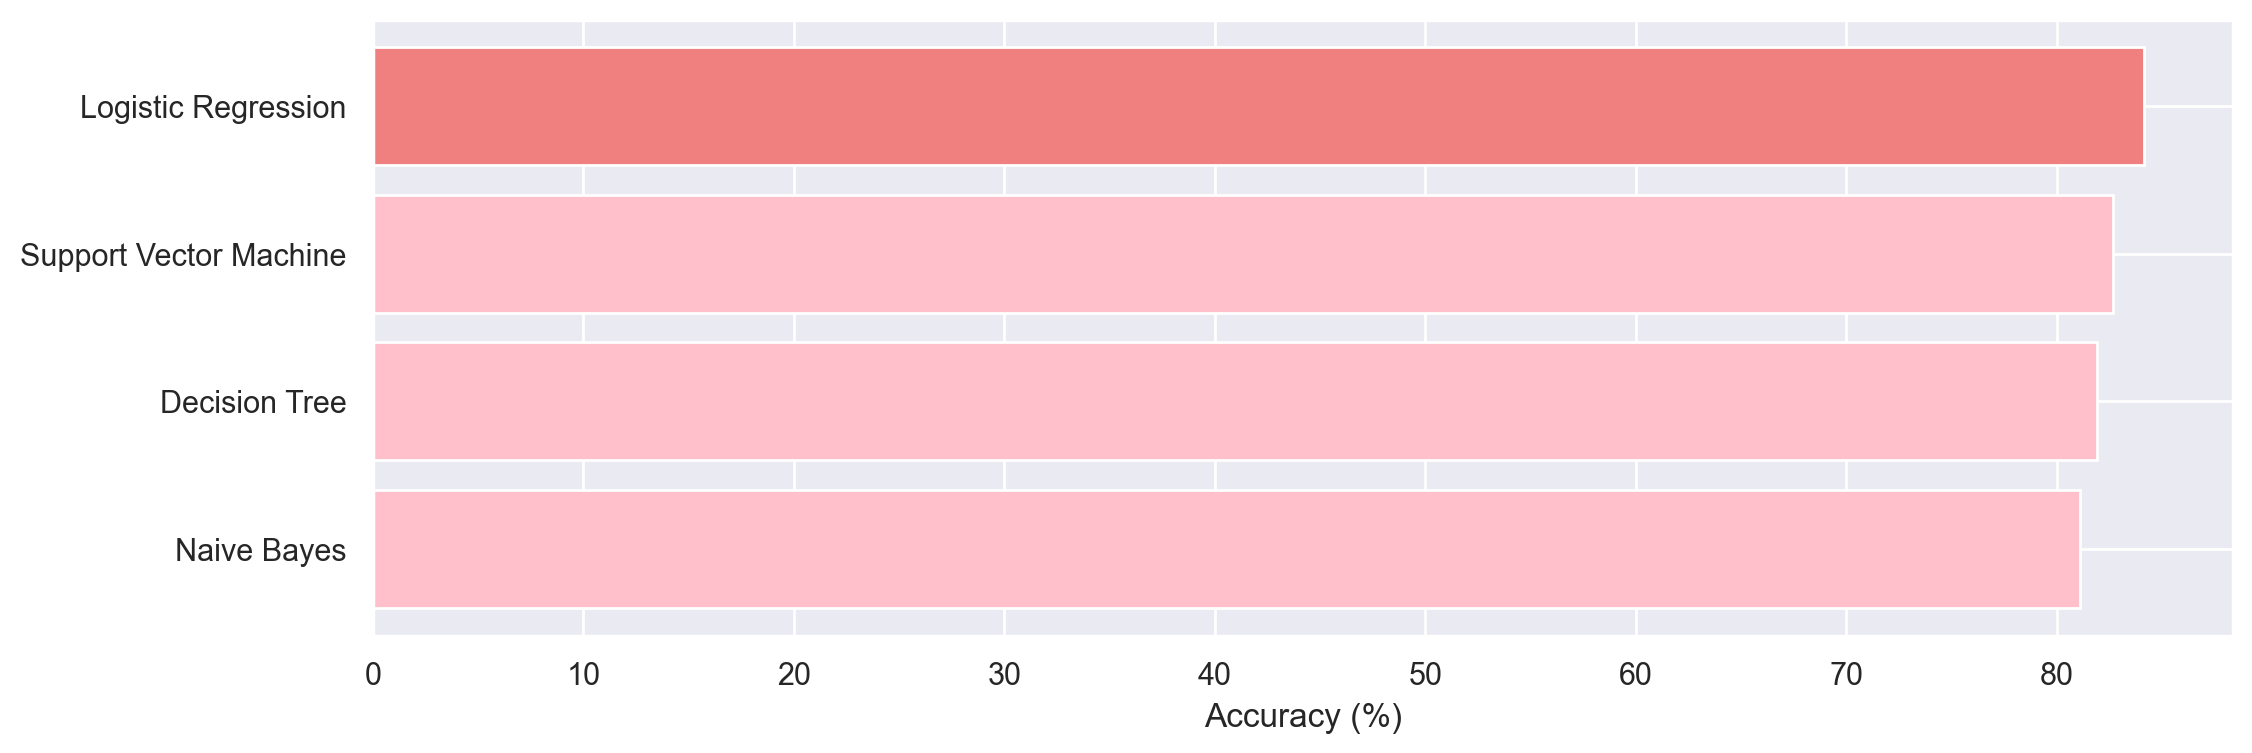

In [73]:
x = ["Naive Bayes","Decision Tree","Support Vector Machine","Logistic Regression"]
y = [np.round(accuracy_score(y_test,naive_prediction)*100,3),np.round(accuracy_score(y_test,decision_prediction)*100,3),
     np.round(accuracy_score(y_test,support_prediction)*100,3),np.round(accuracy_score(y_test,logistic_prediction)*100,3)]

color = []
for _ in np.array(y):
    if _ == np.max(np.array(y)):
        color.append("lightcoral")
    else:
        color.append("pink")

plt.figure(figsize=(12,4),dpi=200)
plt.barh(x,y,color=color)
plt.xlabel("Accuracy (%)")
plt.show()